In [1]:
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_yellowpages(session, industry, pageNumber):
    base_url = "https://www.yellowpages.com.au/search/listings?"
    
    # Concatenating parameters to the base_url
    url = f"{base_url}clue={industry}&locationClue=New+South+Wales&pageNumber={pageNumber}"
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.9'
    }

    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:  # Fixed exception name
        print(f"Error fetching the webpage: {e}")
        return []

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Adjust the selector as needed
    business_elements = soup.select("h3.MuiTypography-h3")  # Selector to be adjusted
    business_names = [biz.text.split('&')[0].strip() for biz in business_elements]
    
    return business_names

def get_all_business_names(industry):
    all_names = []
    page_number = 1
    with requests.Session() as session:
        while page_number <= 5:  # Setting a limit on page numbers to scrape
            names = scrape_yellowpages(session, industry, page_number)
            if not names:
                break
            all_names.extend(names)
            page_number += 1
            sleep_time = random.uniform(3, 6)
            time.sleep(sleep_time)
        all_names = list(set(all_names))
    return all_names

industry = input("Enter the industry: ")

results = get_all_business_names(industry)
print(results)

['Apex Pest', 'Pest Alert', 'EC Morelli Pest Management Solutions', 'Pelican Pest Control', 'New England Pest Management Pty Ltd', 'Border Pest Control', 'Keira Pest Control Pty. Ltd.', 'Roach Busters Pest Control Services', 'Australian Pest Specialists', 'Alliance Pest Control', 'Pest To Kill', 'Termi Mesh', 'Newmans Building', 'Penrith Pest Control', 'Coolamon Pest Control', 'Cavalier Pest Control Pty Ltd', 'Bates Pest Control', 'Inland Pest Management', 'Southern Highlands Pest Control', 'Scott Hills Pest Management', 'Ian Fyfe Pest Control', 'Bees Knees Pest Management Services', 'Ant-Eater Environmental Services', 'Geoff Lee', 'AM Pest Solutions', 'Dynamite Pest Control', 'Hammond Pest Management', 'Southpest Pty Ltd', 'North Sydney Pest Management', 'Bill Hartley Pest Management', 'Andrew Fagan Pest Control', 'Elite Maintenance Service', 'Active Pest Management', 'Sullivan Pest Management Pty Ltd', 'Insight Pest Management', 'Advanced Pest Management - Riverina', 'Commercial Pest

In [2]:
# Import the function
from keywordgen import generate_business_name_suggestions

In [4]:
# Import the function
#from keywordgen import generate_business_name_suggestions

# Define the industry for which you want business name suggestions
industry = "Pest Control"  # You can change this to your desired industry

# Generate business name suggestions based on the industry
suggested_names = generate_business_name_suggestions(industry)

# Print the suggestions without numbers
#suggested_names = [name.split('. ')[1] for name in suggested_names if '. ' in name]
print(suggested_names)

['Extermination', 'Infestation', 'Pesticides', 'Rodents', 'Termites', 'Bedbugs', 'Ants', 'Cockroaches', 'Mosquitoes', 'Bees', 'Wasps', 'Fleas', 'Mice', 'Rats', 'Birds', 'Spiders', 'Insects', 'Nuisance', 'Pestilence']


In [ ]:
#additional_business_names = ["Bugz Off", "Sydney Side Pest", "Pest Control", "Pesticides"]
#final_suggestions = generate_business_name_suggestions("Pest Control", additional_business_names)
#print(final_suggestions)

In [5]:
industry = "Pest Control"
additional_names = ["Bugz Off", "Sydney Side Pest", "Pest Control", "Pesticides"]
suggestions = generate_business_name_suggestions(industry, additional_names)
print(suggestions)

['Extermination', 'Infestation', 'Pesticides', 'Rodents', 'Termites', 'Bedbugs', 'Insects', 'Ants', 'Cockroaches', 'Mosquitoes', 'Fleas', 'Wasps', 'Bees', 'Mice', 'Rats', 'Spiders', 'Bugs', 'Weeds', 'Fumigation']
['Pest', 'Control', 'Bugz']
['Infestation', 'Mosquitoes', 'Termites', 'Bugs', 'Extermination', 'Rodents', 'Fleas', 'Wasps', 'Ants', 'Pesticides', 'Pest', 'Weeds', 'Bugz', 'Bees', 'Bedbugs', 'Insects', 'Mice', 'Rats', 'Fumigation', 'Cockroaches', 'Spiders', 'Control']


In [5]:
from abnlookup import query_postcodes

# List of postcodes to query
postcodes_to_query = ['2000']  # Add more postcodes as needed

# List of names to query
names_to_query = suggested_names  # Add more names as needed

# Call the function with the list of postcodes and names
result_df = query_postcodes(postcodes_to_query, names_to_query)

# Display the resulting DataFrame
print(result_df)

Accessing URL: https://abr.business.gov.au/abrxmlsearchRPC/AbrXmlSearch.asmx/ABRSearchByNameSimpleProtocol?name=Extermination&postcode=2000&legalName=&tradingName=&NSW=Y&SA=N&ACT=N&VIC=N&WA=N&NT=N&QLD=N&TAS=N&authenticationGuid=b03c103e-ab73-441a-946c-bfa45c609d63
Returned XML: b'<?xml version="1.0" encoding="utf-8"?>\r\n<ABRPayloadSearchResults xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://abr.business.gov.au/ABRXMLSearchRPC/literalTypes">\r\n  <request>\r\n    <nameSearchRequest>\r\n      <authenticationGUID>b03c103e-ab73-441a-946c-bfa45c609d63</authenticationGUID>\r\n      <name>Extermination</name>\r\n      <filters>\r\n        <nameType>\r\n          <tradingName>Y</tradingName>\r\n          <legalName>Y</legalName>\r\n        </nameType>\r\n        <postcode>2000</postcode>\r\n        <stateCode>\r\n          <QLD>N</QLD>\r\n          <NT>N</NT>\r\n          <SA>N</SA>\r\n          <WA>N</WA>\r\n          <VIC>N</

In [81]:
dts = result_df
keywords = names_to_query

# Initialize a Counter to store the count of each keyword
keyword_counter = Counter()

# Initialize a dictionary to store examples of organisation names for each keyword
keyword_examples = {keyword: [] for keyword in keywords}

# Loop through each row in the dataset to check for the presence of keywords in the Organisation Name
for index, row in dts.iterrows():
    org_name = row['Organisation Name'].lower()
    for keyword in keywords:
        keyword_lower = keyword.lower()
        if re.search(r'\b' + re.escape(keyword_lower) + r'\b', org_name):
            keyword_counter[keyword] += 1
            if len(keyword_examples[keyword]) < 5:
                keyword_examples[keyword].append(org_name)

# Display the count and examples for each keyword
print("Keyword Counter:", keyword_counter)
print("Keyword Examples:", keyword_examples)

Keyword Counter: Counter({'Pest': 97, 'Wildlife': 27, 'Bees': 7, 'Termites': 3, 'Vermin': 1, 'Bugs': 1})
Keyword Examples: {'Exterminate': [], 'Insects': [], 'Bugs': ['bugs or us termites and pest'], 'Rodents': [], 'Termites': ['buzz off termites & pest management pty ltd', 'bugs or us termites and pest', 'ultra pest & termites'], 'Infestation': [], 'Pesticides': [], 'Fumigation': [], 'Pest': ['elite pest & termite solutions pty ltd', 'sydney termite and pest control pty ltd', 'corporate pest management pty limited', 'proven pest control', 'scorpex pest management'], 'Vermin': ['ronin feral pest and vermin control'], 'Ants': [], 'Cockroaches': [], 'Mice': [], 'Rats': [], 'Bedbugs': [], 'Wildlife': ['wildlife wanderer', 'australian wildlife parks', 'blue mountains wildlife', 'featherdale wildlife park', 'global wildlife fund limited'], 'Mosquitoes': [], 'Bees': ['business bees pty ltd', 'bees at revelwood', 'cleaning bees australia pty ltd', 'bees knees pest control', 'bucketty bees'], 

In [82]:
#Most common words other than the keywords

#Initialize a Counter to store the frequency of all words in organization names
all_words_counter = Counter()

# Loop through each row in the dataset to collect words in the Organisation Name
for index, row in dts.iterrows():
    org_name = row['Organisation Name'].lower()
    words = re.findall(r'\b\w+\b', org_name)
    all_words_counter.update(words)

# Remove the keywords from the counter
for keyword in keywords:
    keyword_lower = keyword.lower()
    if keyword_lower in all_words_counter:
        del all_words_counter[keyword_lower]

# Get the top 10 most common words other than the keywords
top_10_common_words = all_words_counter.most_common(10)

top_10_common_words

[('control', 56),
 ('pty', 35),
 ('ltd', 26),
 ('management', 23),
 ('and', 21),
 ('termite', 12),
 ('solutions', 12),
 ('the', 11),
 ('limited', 10),
 ('services', 9)]

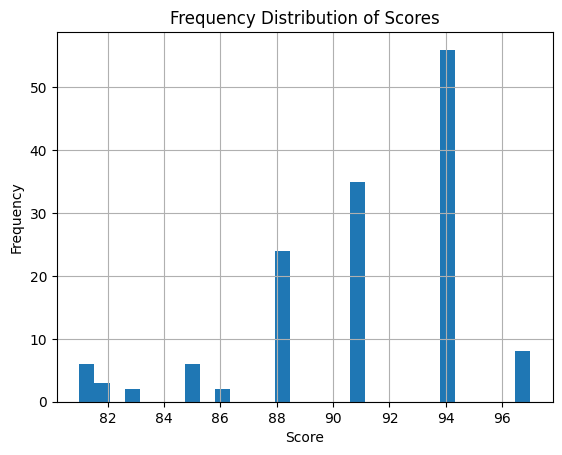

(            Score
 count  142.000000
 mean    90.964789
 std      3.990080
 min     81.000000
 25%     88.000000
 50%     91.000000
 75%     94.000000
 max     97.000000,
 Identifier Status
 Active    142
 Name: count, dtype: int64,
 Is Current Indicator
 Y    142
 Name: count, dtype: int64,
 State Code
 NSW    142
 Name: count, dtype: int64)

In [103]:
# 1. Basic statistics of numeric columns
numeric_stats = dts[['Score', 'Postcode']].describe()

# 2. Distribution of `Identifier Status`
identifier_status_distribution = dts['Identifier Status'].value_counts()

# 3. Distribution of `Is Current Indicator`
current_indicator_distribution = dts['Is Current Indicator'].value_counts()

# 4. Distribution of organizations by `State Code`
state_code_distribution = dts['State Code'].value_counts()

# 5. Distribution of scores
score_distribution = dts['Score'].hist(bins=30)

# Add title and labels
plt.title('Frequency Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

numeric_stats, identifier_status_distribution, current_indicator_distribution, state_code_distribution

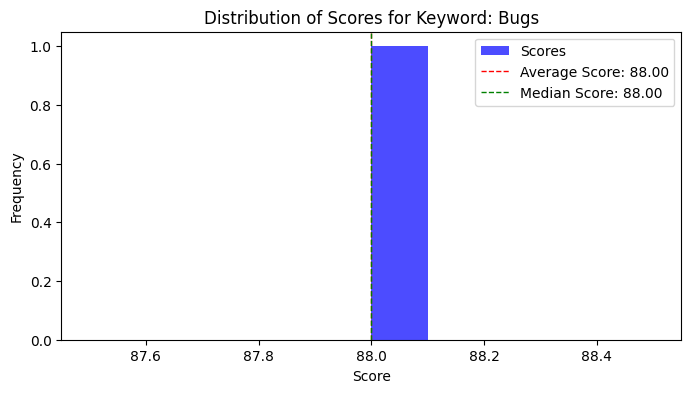

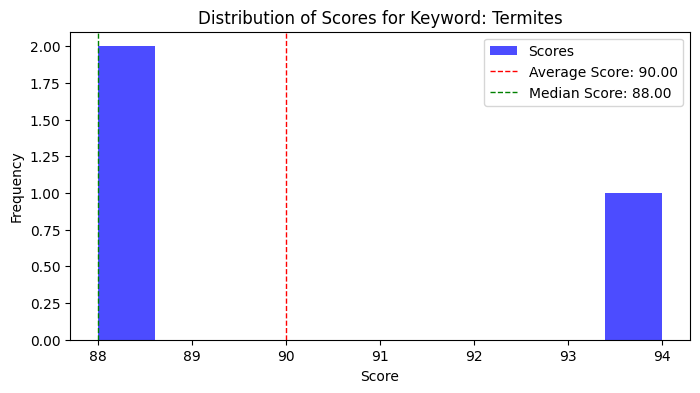

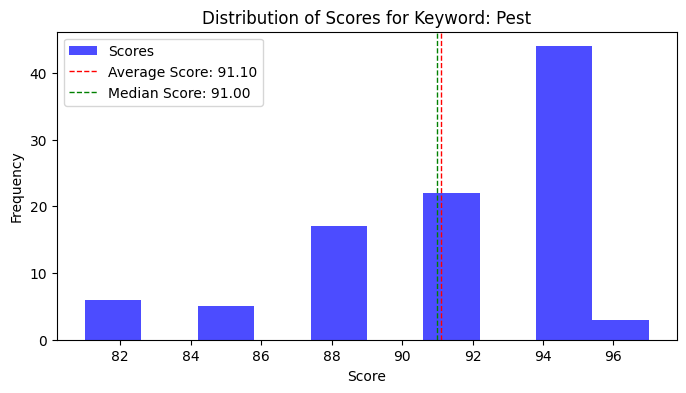

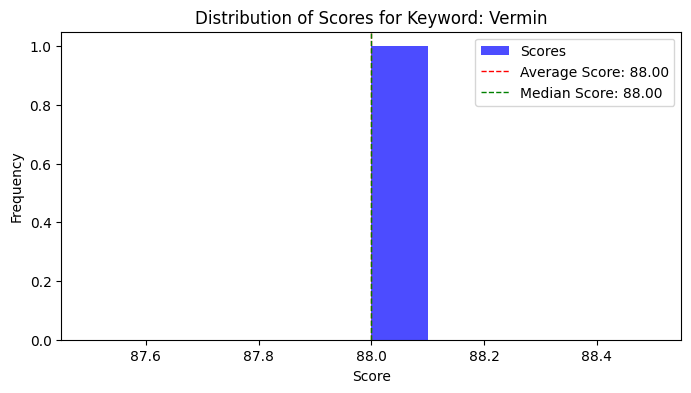

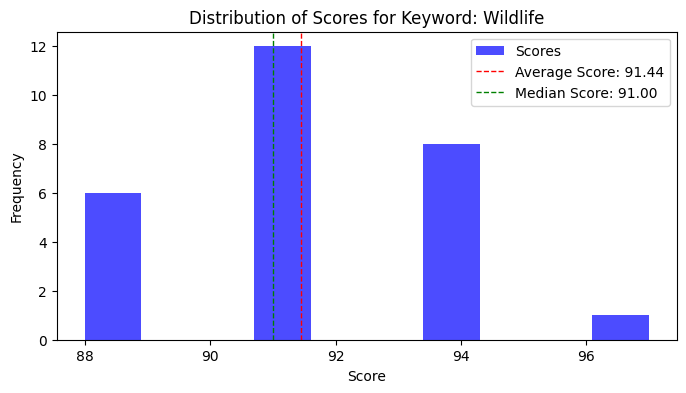

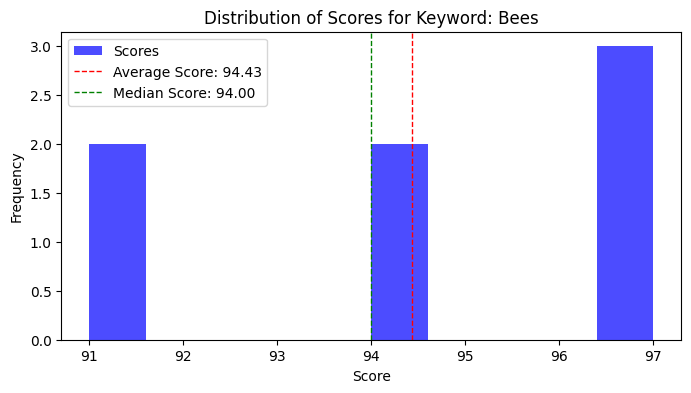

{'Bugs': {'Average Score': 88.0, 'Median Score': 88.0},
 'Termites': {'Average Score': 90.0, 'Median Score': 88.0},
 'Pest': {'Average Score': 91.10309278350516, 'Median Score': 91.0},
 'Vermin': {'Average Score': 88.0, 'Median Score': 88.0},
 'Wildlife': {'Average Score': 91.44444444444444, 'Median Score': 91.0},
 'Bees': {'Average Score': 94.42857142857143, 'Median Score': 94.0}}

In [83]:
#Score Analysis

# Initialize a list to store scores of organizations that match keywords
keyword_scores = {keyword: [] for keyword in keywords}

# Collect scores for organizations that match keywords
for index, row in dts.iterrows():
    org_name = row['Organisation Name'].lower()
    score = row['Score']
    for keyword in keywords:
        keyword_lower = keyword.lower()
        if re.search(r'\b' + re.escape(keyword_lower) + r'\b', org_name):
            keyword_scores[keyword].append(score)

# Calculate average and median scores for each keyword and plot distribution
score_summary = {}
for keyword, scores in keyword_scores.items():
    if scores:
        avg_score = np.mean(scores)
        median_score = np.median(scores)
        score_summary[keyword] = {'Average Score': avg_score, 'Median Score': median_score}

        plt.figure(figsize=(8, 4))
        plt.hist(scores, bins=10, alpha=0.7, label='Scores', color='blue')
        plt.axvline(avg_score, color='red', linestyle='dashed', linewidth=1, label=f'Average Score: {avg_score:.2f}')
        plt.axvline(median_score, color='green', linestyle='dashed', linewidth=1, label=f'Median Score: {median_score:.2f}')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Scores for Keyword: {keyword}')
        plt.legend()
        plt.show()

score_summary

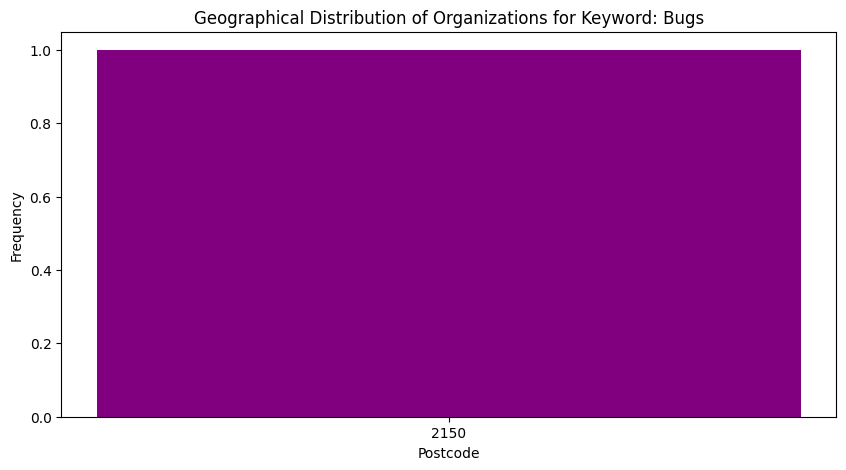

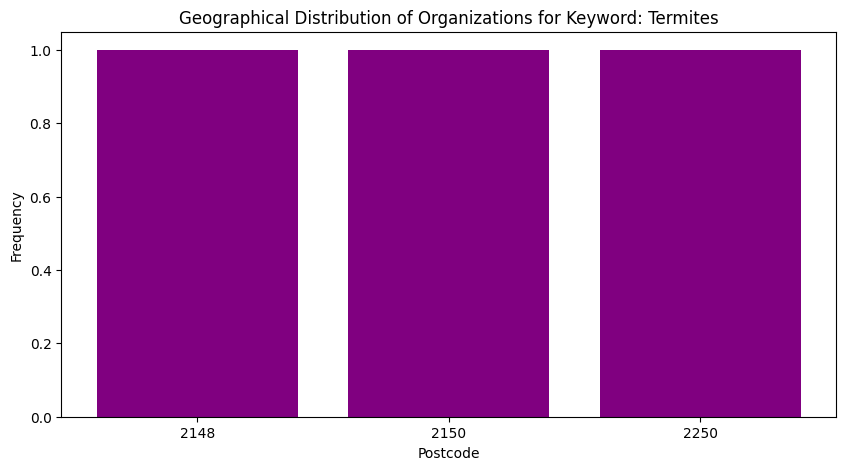

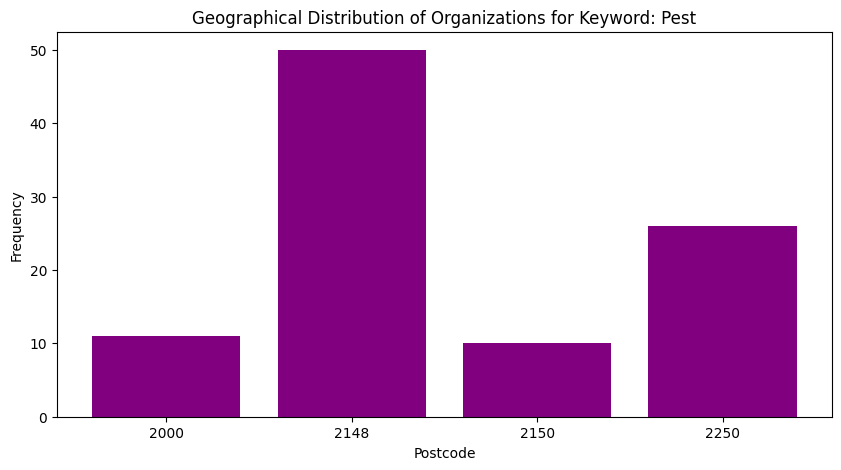

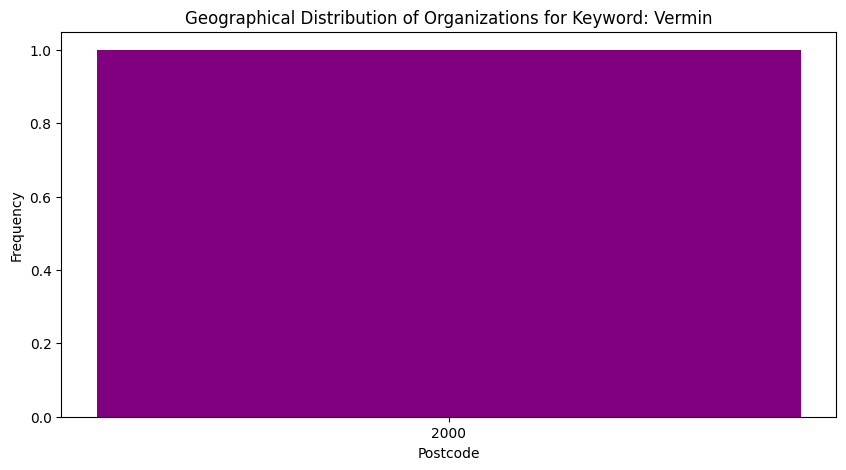

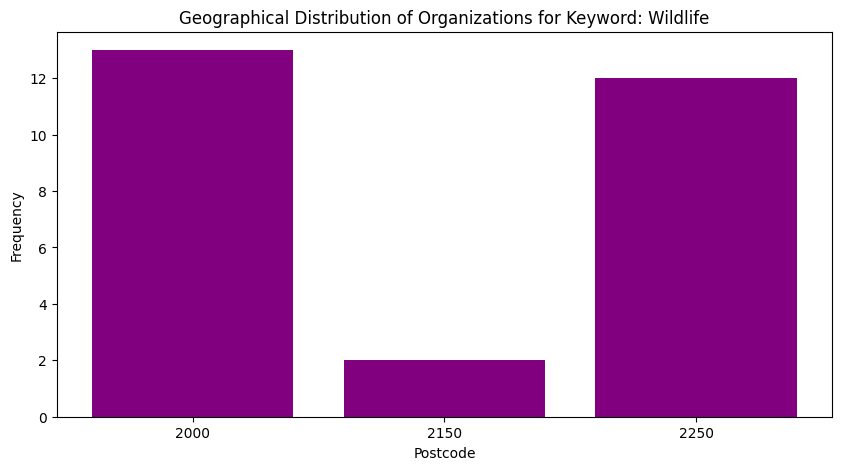

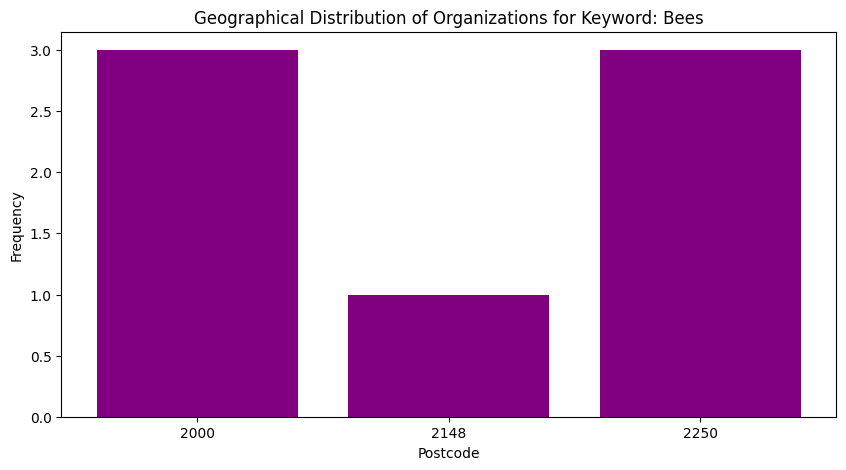

{'Exterminate': Counter(),
 'Insects': Counter(),
 'Bugs': Counter({'2150': 1}),
 'Rodents': Counter(),
 'Termites': Counter({'2148': 1, '2150': 1, '2250': 1}),
 'Infestation': Counter(),
 'Pesticides': Counter(),
 'Fumigation': Counter(),
 'Pest': Counter({'2148': 50, '2250': 26, '2000': 11, '2150': 10}),
 'Vermin': Counter({'2000': 1}),
 'Ants': Counter(),
 'Cockroaches': Counter(),
 'Mice': Counter(),
 'Rats': Counter(),
 'Bedbugs': Counter(),
 'Wildlife': Counter({'2000': 13, '2250': 12, '2150': 2}),
 'Mosquitoes': Counter(),
 'Bees': Counter({'2000': 3, '2250': 3, '2148': 1}),
 'Wasps': Counter(),
 'Spiders': Counter()}

In [85]:
# Initialize a dictionary to store the count of organizations in each postcode for each keyword
postcode_counts = {keyword: Counter() for keyword in keywords}

# Collect postcode data for organizations that match keywords
for index, row in dts.iterrows():
    org_name = row['Organisation Name'].lower()
    postcode = row['Postcode']
    for keyword in keywords:
        keyword_lower = keyword.lower()
        if re.search(r'\b' + re.escape(keyword_lower) + r'\b', org_name):
            postcode_counts[keyword][postcode] += 1

# Plot the geographical distribution for each keyword
for keyword, counts in postcode_counts.items():
    if counts:
        plt.figure(figsize=(10, 5))
        postcodes = list(counts.keys())
        frequencies = list(counts.values())
        plt.bar(postcodes, frequencies, color='purple')
        plt.xlabel('Postcode')
        plt.ylabel('Frequency')
        plt.title(f'Geographical Distribution of Organizations for Keyword: {keyword}')
        plt.show()

postcode_counts

In [92]:
# Convert keywords and organization names to lowercase for accurate matching
keywords_lower = [word.lower() for word in keywords]
org_names_lower = dts['Organisation Name'].str.lower()

# Count the occurrences of each keyword in the organization names
keyword_counts = {keyword: org_names_lower.str.contains(keyword).sum() for keyword in keywords_lower}

keyword_counts


{'exterminate': 0,
 'insects': 0,
 'bugs': 1,
 'rodents': 0,
 'termites': 3,
 'infestation': 0,
 'pesticides': 0,
 'fumigation': 0,
 'pest': 99,
 'vermin': 1,
 'ants': 0,
 'cockroaches': 0,
 'mice': 0,
 'rats': 0,
 'bedbugs': 0,
 'wildlife': 27,
 'mosquitoes': 0,
 'bees': 7,
 'wasps': 0,
 'spiders': 0}

In [94]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.util import ngrams

# Tokenize the organization names
tokens = [word for name in org_names_lower for word in nltk.word_tokenize(name)]

# Remove the keywords from the tokens
filtered_tokens = [token for token in tokens if token not in keywords_lower]

# Calculate word frequencies
word_frequencies = Counter(filtered_tokens)

# Calculate bigram frequencies
bigrams = list(ngrams(filtered_tokens, 2))
bigram_frequencies = Counter(bigrams)

# Get the top 10 most common words and bigrams
top_words = word_frequencies.most_common(10)
top_bigrams = bigram_frequencies.most_common(10)

top_words, top_bigrams

[nltk_data] Downloading package punkt to /Users/vishalraj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


([('control', 56),
  ('pty', 35),
  ('ltd', 26),
  ('management', 23),
  ('and', 21),
  ('&', 15),
  ('termite', 12),
  ('solutions', 12),
  ('the', 11),
  ('limited', 10)],
 [(('pty', 'ltd'), 25),
  (('control', 'pty'), 8),
  (('management', 'pty'), 7),
  (('pty', 'limited'), 7),
  (('the', 'trustee'), 6),
  (('trustee', 'for'), 6),
  (('and', 'control'), 5),
  (('solutions', 'pty'), 4),
  (('termite', '&'), 4),
  (('&', 'control'), 4)])

In [95]:
# Manual tokenization using split() method
tokens_manual = [word for name in org_names_lower for word in name.split()]

# Remove the keywords from the tokens
filtered_tokens_manual = [token for token in tokens_manual if token not in keywords_lower]

# Calculate word frequencies using manual tokens
word_frequencies_manual = Counter(filtered_tokens_manual)

# Calculate bigram frequencies using manual tokens
bigrams_manual = list(ngrams(filtered_tokens_manual, 2))
bigram_frequencies_manual = Counter(bigrams_manual)

# Get the top 10 most common words and bigrams using manual tokens
top_words_manual = word_frequencies_manual.most_common(10)
top_bigrams_manual = bigram_frequencies_manual.most_common(10)

top_words_manual, top_bigrams_manual

([('control', 56),
  ('pty', 32),
  ('ltd', 25),
  ('management', 23),
  ('and', 21),
  ('&', 14),
  ('termite', 12),
  ('solutions', 12),
  ('limited', 10),
  ('the', 10)],
 [(('pty', 'ltd'), 25),
  (('control', 'pty'), 8),
  (('pty', 'limited'), 7),
  (('management', 'pty'), 6),
  (('the', 'trustee'), 6),
  (('trustee', 'for'), 6),
  (('and', 'control'), 5),
  (('solutions', 'pty'), 4),
  (('termite', '&'), 4),
  (('&', 'control'), 4)])

In [98]:
# Identify organizations that don't contain any of the provided keywords in their names
non_matching_orgs = dts[~org_names_lower.str.contains('|'.join(keywords_lower))]['Organisation Name'].unique()
print(len(non_matching_orgs))
non_matching_orgs

10


array(['BUGIS PTY LTD', 'The Trustee for Pasta e Sugo Trust',
       'RATH PTY LTD', 'WILD LIFE SYDNEY', 'WILD LIFE Conservation Fund',
       'Wild Life Hamilton Island', 'SPIDER VEINS AUSTRALIA PTY LTD',
       "The Trustee for Are Aye Bee's Superannuation Fund", 'THERMIT',
       'TERMITE DETECTION AND KILLING SYSTEMS'], dtype=object)

## Some observations:

Organizations like "WILD LIFE SYDNEY" and "WILD LIFE Conservation Fund" seem related to wildlife but don't directly match any of the provided keywords.

"SPIDER VEINS AUSTRALIA PTY LTD" might be related to medical services rather than pest control, given the context of "spider veins."

"TERMITE DETECTION AND KILLING SYSTEMS" is related to termite control but uses phrasing that didn't directly match the keywords.

Some of the names, like "The Trustee for Pasta e Sugo Trust" or "RATH PTY LTD", do not seem related to pest control or the provided keywords at all.

In [99]:
# Extract potential synonyms or related terms from the top words (excluding common business terms)
potential_synonyms = [word[0] for word in top_words_manual if word[0] not in ["pty", "ltd", "management", "and", "&", "the", "limited", "for"]]

potential_synonyms

['control', 'termite', 'solutions']

## Here are the potential synonyms or related terms extracted from the most common words in the organization names (excluding generic business terms):

Control: This term is related to pest control, which is a central theme of the provided keywords.

Termite: While "Termite" is already in the keyword list, it might have appeared here due to a case difference. It remains a relevant term.

Solutions: This term suggests that many organizations might offer a range of services or solutions related to pests.
From this analysis, "Control" and "Termite" are directly relevant to the context of pest control. "Solutions" is a more generic term but indicates that these organizations might be offering various pest-related services.

In conclusion, the dataset seems largely relevant to the context of pest control, wildlife management, and related services. However, as with any data extraction based on keywords, there might be a few outliers, as we've identified.